# Project -->> ML - Test Score Analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('scores_data.csv')
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [5]:
df.shape

(149, 3)

In [6]:
df.nunique()

Batch            3
User_ID        149
   Score         8
dtype: int64

In [7]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Data Cleaning

In [10]:
df.columns.tolist()

['Batch ', 'User_ID ', '   Score   ']

In [11]:
df.columns = df.columns.str.strip()

In [12]:
df.columns.tolist()

['Batch', 'User_ID', 'Score']

In [13]:
def clean_score(score_str):
    try:
        return float(score_str.split('/')[0])
    except:
        return None

df['Score_Numeric'] = df['Score'].apply(clean_score)

print(f"\nMissing scores after cleaning: {df['Score_Numeric'].isnull().sum()}")

print(df[['Batch', 'Score', 'Score_Numeric']].head())


Missing scores after cleaning: 0
        Batch  Score  Score_Numeric
0  AI_ELITE_7  6 / 7            6.0
1  AI_ELITE_7  6 / 7            6.0
2  AI_ELITE_7  7 / 7            7.0
3  AI_ELITE_7  7 / 7            7.0
4  AI_ELITE_7  4 / 7            4.0


**Observation:** The Score_Numeric column now contains floats (e.g: 6.0, 7.0), enabling statistical calculations.

In [15]:
batch_scores = df.groupby('Batch')['Score_Numeric'].describe()
batch_scores

,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,3.791667,1.443376,0.0,3.0,4.0,4.25,7.0
AI_ELITE_6,48.0,4.229167,1.640441,0.0,3.0,4.0,5.00,7.0
AI_ELITE_7,53.0,5.056604,1.446682,2.0,4.0,5.0,6.00,7.0


In [16]:
batch_scores = (df.groupby('Batch')['Score_Numeric']
                .agg(['count','mean','median','std','min','max'])
                .reset_index()
                .sort_values('mean',ascending = False))
batch_scores             

,Batch,count,mean,median,std,min,max
2,AI_ELITE_7,53,5.056604,5.0,1.446682,2.0,7.0
1,AI_ELITE_6,48,4.229167,4.0,1.640441,0.0,7.0
0,AI_ELITE_4,48,3.791667,4.0,1.443376,0.0,7.0


In [17]:
#score Distribution

score_distribution = df.groupby(['Batch','Score_Numeric']).size().unstack(fill_value=0).sort_index(axis=1)

print(f'Score distribution (count of students per score per batch):\n',score_distribution)

Score distribution (count of students per score per batch):
 Score_Numeric  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0
Batch                                                
AI_ELITE_4       1    1    7    8   19    8    1    3
AI_ELITE_6       1    2    3    9   11   13    4    5
AI_ELITE_7       0    0    2    7   10   11   13   10


**Observation:**
- Batch 7 is the highest performing group on average.
- Batch 6 has the highest standard deviation (1.64),
basically it indicating the most inconsistent performance (a mix of very high and very low scores).
- Batch 4 has the lowest mean score, indicating a general struggle with the material.

# Visualization

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

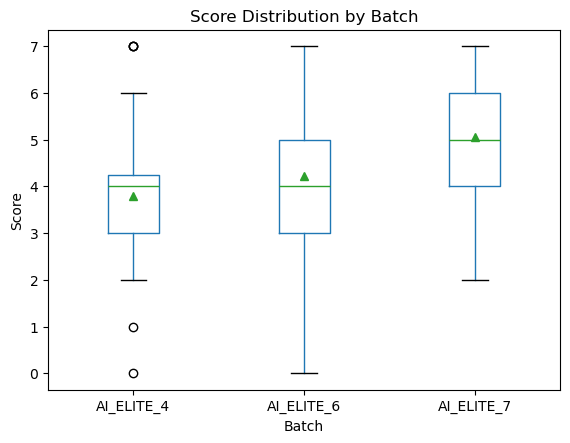

In [21]:
# Bi-Variate Analysis
plt.figure(figsize=(10,6))
df.boxplot(column = 'Score_Numeric', by='Batch',grid = False ,showmeans = True)
plt.title('Score Distribution by Batch')
plt.suptitle('')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.savefig('batch_scores_boxplot.png')

Text(0, 0.5, 'Score')

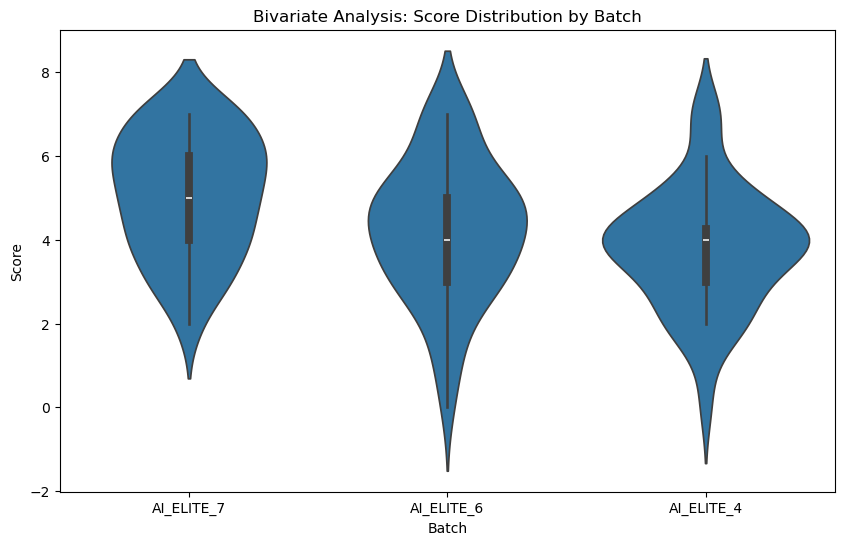

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Batch', y='Score_Numeric', data=df)
plt.title('Bivariate Analysis: Score Distribution by Batch')
plt.xlabel('Batch')
plt.ylabel('Score')

**Observation:**
- The boxplot confirms that Batch 7 (on the right) has a higher median
- and the box (representing the middle 50% of students) is shifted upwards compared to the other two batches.

NameError: name 'Batch' is not defined

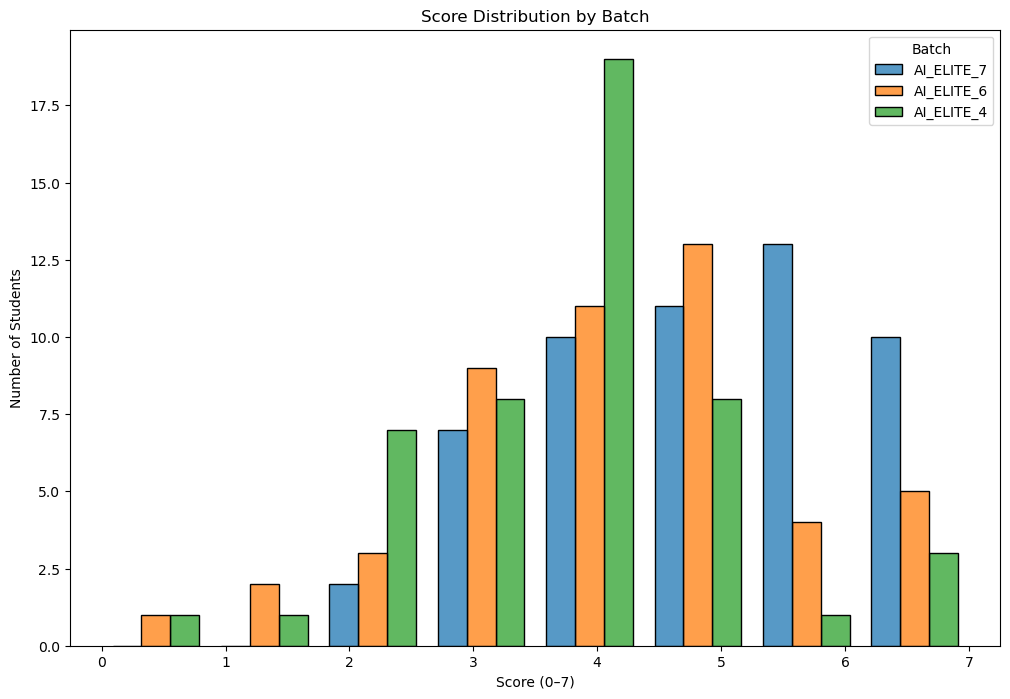

In [24]:
# Univariate analysis
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="Score_Numeric", hue="Batch", multiple="dodge", bins=8, shrink=0.8)
plt.title("Score Distribution by Batch")
plt.xlabel("Score (0–7)")
plt.ylabel("Number of Students")
plt.legend(Batch)
plt.show()

In [ ]:
skewness = df['Score_Numeric'].skew()
kurtosis = df['Score_Numeric'].kurt()
print(f'skewness:',skewness)
print(f'kurtosis:',kurtosis)

# Hypothesis Testing

In [ ]:
import scipy.stats as stats
# Check Assumptions (Normality & Homogeneity of Variance)

batches = df['Batch'].unique()
batch_data = [df[df['Batch'] == b]['Score_Numeric'] for b in batches]

print("\n--- Assumption Checks ---")

In [ ]:
# Shapiro-Wilk Test for Normality
# H0: Data is normally distributed
for b, data in zip(batches, batch_data):
    stat, p = stats.shapiro(data)
    print(f"Shapiro-Wilk for {b}: p-value = {p:.4f} ({'Normal' if p > 0.05 else 'Not Normal'})")

**Observation:**
- All batches had p-values < 0.05 (e.g., Batch 7 p=0.0015).
- Data is NOT Normal. This is expected for discrete scores (0-7).

In [ ]:
# Levene's Test for Homogeneity of Variances
# H0: Variances are equal
stat, p_levene = stats.levene(*batch_data)
print(f"Levene's Test: p-value = {p_levene:.4f} ({'Equal Variances' if p_levene > 0.05 else 'Unequal Variances'})")

**Observation**
- p-value = 0.3758 (> 0.05).
- Variances are Equal.

In [ ]:
# Choosing Test
# If Normal & Equal Variances -> ANOVA
# Else -> Kruskal-Wallis

print("\n--- Hypothesis Test Results ---")
if all(stats.shapiro(d)[1] > 0.05 for d in batch_data) and p_levene > 0.05:
    print("Assumptions met for ANOVA.")
    f_stat, p_val = stats.f_oneway(*batch_data)
    print(f"One-way ANOVA: F-stat={f_stat:.4f}, p-value={p_val:.4f}")
    test_used = "ANOVA"
else:
    print("Assumptions for ANOVA not met (likely due to non-normality). Using Kruskal-Wallis.")
    h_stat, p_val = stats.kruskal(*batch_data)
    print(f"Kruskal-Wallis Test: H-stat={h_stat:.4f}, p-value={p_val:.4f}")
    test_used = "Kruskal-Wallis"

**Observation:**
- Since the normality assumption failed, we use this non-parametric alternative to ANOVA. 
- It tests if the medians of the groups are different.

- Null Hypothesis (H_0): All batches have the same score distribution.
- Test Result: Kruskal-Wallis H-statistic = 16.73, p-value = 0.0002.

In [ ]:
# Conclusion
alpha = 0.05
if p_val < alpha:
    print(f"Conclusion: Reject Null Hypothesis. Significant difference found between batches using {test_used}.")
else:
    print(f"Conclusion: Fail to reject Null Hypothesis. No significant difference found using {test_used}.")

**Observation:**
- Since the p-value (0.0002) is effectively zero (far less than the standard 0.05 threshold),
- we Reject the Null Hypothesis.

**final result :**
There is a statistically significant difference in performance between the batches.